# 朴素贝叶斯，支持向量机和理论

## 核函数构造

### 相加

是核函数，两个半正定矩阵相加仍然是半正定。

$$
\begin{aligned}
& \forall z \, z^TG_1z \geq 0, z^TG_2z \geq 0 \\
\implies & \forall z \, z^T G z = z^TG_1z + z^TG_2z \geq 0
\end{aligned}
$$

### 相减

不是核函数，令$K_2 = 2K_1$，则：

$$ \forall z \, z^T G z = z^T (G_1 - 2G_1) z = - z^T G_1 z \leq 0$$

### 正系数

是核函数

$$
\begin{aligned}
& \forall z \, z^TG_1z \geq 0 \\
\implies & \forall z \, z^T G z = az^TG_1z  \geq 0
\end{aligned}
$$

### 负系数

不是核函数

$$
\begin{align}
& \forall z \, z^TG_1z \geq 0 \\
\implies & \forall z \, z^T G z = -az^TG_1z  \leq 0
\end{align}
$$

### 相乘

是核函数，由于$K_1, K_2$是核函数：

$$
\begin{aligned}
& \exists \phi^{(1)} \, K_1(x,z) = \phi^{(1)}(x)^T\phi^{(1)}(z)=\sum_i \phi_i^{(1)}(x)\phi_i^{(1)}(z) \\
& \exists \phi^{(1)} \, K_2(x,z) = \phi^{(2)}(x)^T\phi^{(2)}(z)=\sum_i \phi_i^{(2)}(x)\phi_i^{(2)}(z)
\end{aligned}
$$

因此可以推导得到：

$$
\begin{aligned}
K(x,z) &= K_1(x,z)K_2(x,z) \\
&= \sum_i \phi_i^{(1)}(x)\phi_i^{(1)}(z)\sum_i \phi_i^{(2)}(x)\phi_i^{(2)}(z) \\
&= \sum_i \sum_j \phi_i^{(1)}(x)\phi_i^{(1)}(z) \phi_j^{(2)}(x)\phi_j^{(2)}(z) \\
&= \sum_i \sum_j (\phi_i^{(1)}(x)\phi_j^{(2)}(x))(\phi_i^{(1)}(z)\phi_j^{(2)}(z)) \\
&= \sum_{(i,j)} \psi_{i,j}(x)\psi_{i,j}(z) \\
&= \psi(x)^T \psi(z)
\end{aligned}
$$

### 函数相乘

是核函数。上一种情况的特殊化，令$\psi(x) = f(x)$。

### 映射核函数

是核函数，仍然保持半正定。

### 多项式

是核函数，通过上面的证明，相加，系数，幂，截距运算都保持核函数性质。

## 感知机核函数化

### 高维系数向量

使用高维映射后，更新$\theta$的方法如下：

$$ \theta := \theta + \alpha(y^{(i)} - h_\theta(\phi(x^{(i)})))\phi(x^{(i)})$$

初始化$\theta^{(0)} = \overrightarrow{0}$，$\theta$可被看做是$\phi(x^{(i)})$的线性组合，即$\exists \beta_l, \theta^{(i)} = \sum_{l=1}^i \beta_l \phi(x^{(l)})$，因此$\theta^{(i)}$可以用线性组合的系数$\beta_l$表示。初始的$\theta^{(0)}$即是系数$\beta_l$的空列表。

### 预测新输入

$$g({\theta^{(i)}}^T \phi(x^{(i+1)})) = g(\sum_{l=1}^i \beta_l \cdot \phi(x^{(l)})^T\phi(x^{i+1})) = g(\sum_{l=1}^i \beta_l K(x^{(l)}, x^{(i+1)}))$$

因此只需要在每次迭代时计算$\beta_i = \alpha(y^{(i)} - g({\theta^{(i-1)}}^T \phi(x^{(i)})))$。而${\theta^{(i-1)}}^T \phi(x^{(i)})$同样可以用上面的方法更新。

### 更新新训练集

因为这里是感知机，因此除非样本$\phi(x^{(i)})$错误分类，$y^{(i)} - h_\theta(\phi(x^{(i)}))$一般是0，否则就是$\pm 1, y,h \in \{ 0,1\}$。或者是$\pm 2, y,h \in \{-1,1\}$。因此可以用$\sum_{\{i:y^{(i)} \neq h_{\theta^{(i)}}(\phi(x^{(i)}))\}} \alpha(2y^{(i)}-1)\phi(x^{(i)})$可以表示向量$\theta$，即$\theta^{(i)}=\sum_{i \in Misclassified} \beta_i \phi(x^{(i)})$，即只有分类错误的样本才会增添系数。对于新加的样本同样如此。

## 垃圾邮件分类器

这一篇我得好好记载一下，差不多花了我一整个周日，实际投入时间估计超过八小时，最后还是参考原始的 octave 代码才写出我的 python 代码。但不得不说这一题让我也有很大的收获。python 文件处理，sparse 矩阵利用，贝叶斯公式的本质理解，朴素贝叶斯算法的深入理解，甚至 octave 语法的复习，都收获到不少。虽然最后自己也有些着急，但最终还是斩获了这道题目。

本题的主要难点在于需要真正的去理解朴素贝叶斯算法。讲义中的公式是不计单词次数的，也就是无论出现多少次都按一次计。但本题提供的材料却是考虑了次数。此外，讲义中提供的拉普拉斯平滑公式也有谬误，分母加的是 token 个数而不是简单的 2。此外，需要使用 log 来解决累乘后概率变小的问题。最后，要预测分类，还需要深入的理解贝叶斯公式。之前我一直陷入一个困惑：如果在垃圾邮件中某个关键词出现的概率是 0.9，直观来讲在测试集出现了 3 次，这个测试集是垃圾邮件的概率应该增大，但按公式来看却减小了。实际上的确是减小了，因为多出现一次后虽然概率有 0.9 是垃圾邮件，但还有 0.1 是正常邮件。这 0.1 体现了称为正常邮件的机会。所以概率这东西真的很神奇。再多谈几句先验概率和后验概率。先验概率就是一个经验概率，独立于测试集存在。经验+现状=结论。

展示一下我的代码，虽然简短，但是满满的心血啊！！！

### 朴素贝叶斯

In [2]:
import numpy as np
from scipy.sparse import lil_matrix

def getxy(filename):
    f = open(filename)
    headerline = f.readline().rstrip() # remove trailing character \n
    row, col = [int(x) for x in f.readline().split()] # convert string to list
    tokenlist = f.readline().rstrip()
    matrix = lil_matrix((row,col)) # Row-based linked list sparse matrix
    category = lil_matrix((row,1))  # To construct a matrix efficiently

    for m in range(row):
        line = np.array([int(x) for x in f.readline().rstrip().split()])
        matrix[m, np.cumsum(line[1:-1:2])] = line[2:-1:2] # the cumulative sum of the elements
        category[m] = line[0]

    f.close() # remember close the file after finish using it
    x = matrix.tocsc() # convert lil_matrix to csc_matrix, for the following dot operation
    y = category.toarray().ravel() # convert lil_matrix to dense matrix

    return x,y,row,col

xt,yt,rowt,colt = getxy('MATRIX.TRAIN')

psi1 = (yt * xt + 1) / (sum((yt) * xt) + colt) # * operation represent dot between 1 -d array with sparse matrix
psi0 = ((1-yt) * xt + 1) / (sum((1-yt) * xt) + colt) # use Laplace smoothing

y1 = sum(yt) / rowt
y0 = 1 - y1

xs,ys,rows,cols = getxy('MATRIX.TEST')

yp1 = xs * np.log(psi1) + np.log(y1) # use log convert
yp0 = xs * np.log(psi0) + np.log(y0)

yp = yp1 - yp0
yp[yp > 0] = 1
yp[yp <= 0] = 0

err = yp - ys
print(len(err[err != 0])/rows)

0.01625


### 最大概率的五个关键词

In [4]:
z = np.log(psi1) - np.log(psi0)
temp = np.argpartition(-z,5)
result_args = temp[:5]
import pandas as pd
tokens = pd.read_table('TOKENS_LIST',header=None, sep = ' ').iloc[:,1].values
tokens[result_args]

array(['spam', 'unsubscrib', 'ebai', 'httpaddr', 'valet'], dtype=object)

### 不同训练样本的测试误差

Text(0, 0.5, 'errors')

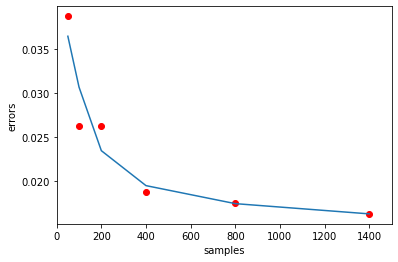

In [7]:
def geterror(trainname, testname):
    xt,yt,rowt,colt = getxy(trainname)

    psi1 = (yt * xt + 1) / (sum((yt)*xt) + colt) # * operation represent dot between 1 -d array with sparse matrix
    psi0 = ((1-yt) * xt + 1) / (sum((1-yt)*xt) + colt) # use Laplace smoothing

    y1 = sum(yt) / rowt
    y0 = 1 - y1

    xs,ys,rows,cols = getxy(testname)

    yp1 = xs * np.log(psi1) + np.log(y1) # use log convert
    yp0 = xs * np.log(psi0) + np.log(y0)

    yp = yp1 - yp0
    yp[yp > 0] = 1
    yp[yp <= 0] = 0

    err = yp - ys
    return len(err[err != 0])/rows

samples = [50,100,200,400,800,1400]
files = ['MATRIX.TRAIN.'+ str(x) for x in samples]

errors = [geterror(x,'MATRIX.TEST') for x in files]

import matplotlib.pyplot as plt
plt.scatter(samples,errors,color = 'red')
plt.hold = True
plt.plot(samples, np.poly1d(np.polyfit(samples, errors,4))(samples))
plt.xlabel('samples')
plt.xlim(0,1500)
plt.ylabel('errors')

### 使用 SVM 分类

Text(0, 0.5, 'errors')

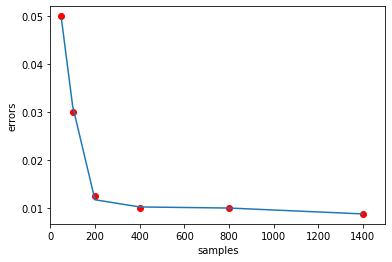

In [10]:
from sklearn import svm

def svmerror(trainname,testname):
    xt,yt,rowt,colt = getxy(trainname)
    lin_svm = svm.LinearSVC()
    lin_svm.fit(xt.toarray(),yt)

    xs,ys,rows,cols = getxy(testname)

    yp = lin_svm.predict(xs.toarray())

    err = yp - ys
    return len(err[err != 0])/rows

samples = [50,100,200,400,800,1400]
files = ['MATRIX.TRAIN.'+ str(x) for x in samples]

svm_errors = [svmerror(x,'MATRIX.TEST') for x in files]

import matplotlib.pyplot as plt
plt.scatter(samples,svm_errors,color = 'red')
plt.hold = True
plt.plot(samples, np.poly1d(np.polyfit(samples, svm_errors,4))(samples))
plt.xlabel('samples')
plt.xlim(0,1500)
plt.ylabel('errors')

### 朴素贝叶斯和 SVM 比较

朴素贝叶斯能用更少的数据快速学习，但也有较高的渐进误差。相反，SVM 在小样本时有较大误差，但能快速的逼近。一般而言，生成算法比判别算法需要更少的样本，但有更高的渐进误差。

## VC维

### 假说集的VC维大小比较

第一个结论为真。

令$VC(H_1)=d$，也就是存在一组d个点可以被$H_1$分割。即对于d个点的任意标签，都存在某一个假说$h \in H_1$来实现分割。由于$H_2$包含了$H_1$所有的假说，因此$H_2$也能分割这组点集。因此有$VC(H_2) \geq d = VC(H_1)$。

### 假说集的VC维数量

第二个结论为真。

如果能证明$k=1$成立，后面就可以通过递归来实现。因此。首先证明如果$H_1 = H_2 \bigcup \{ h \}$，那么有$VC(H_1) \leq VC(H_2) + 1$成立。令$VC(H_1)=d$，$S_1$是一组可被$H_1$分割的d个点的点集。现在任意选取某一个$x \in S_1$，必然存在$h, \bar{h} \in H_1$，两者除了x，对其他点的分割是一致的。这意味着对于点集$S'=S_1 \setminus \{ x \}$，可以用假说集$H' := H \setminus \{ h \}$ 分割。因此有$VC(H') \leq \mid S' \mid = d=1$，同时$H' \subseteq H_2$， 根据上一节的结论有$VC(H') \leq VC(H_2)$，因此$VC(H_2) \leq d-1$，即$VC(H_1) \leq VC(H_2)+1$。

### 并集的VC维

第三个结论为假。

给出一个反例。令$H_2=\{ h_2 \}, H_3 = \{ h_3 \}, \forall x, h_2(x)=0, h_3(x)=1$，因此有$VC(H_2)=VC(H_3)=0$，但对于$H_1 = H_2 \bigcup H_3$ 而言，$VC(H_1)=1$，因此$VC(H_1) \leq VC(H_2) + VC(H_3)$。

## 训练测试异分布

### 误差表示

我们首先用$\varepsilon_0$来表示$\varepsilon_\tau$，然后再反过来表示。

误差的出现只有两种可能，第一种是原始分布有误差，点没误差。第二种是原始分布无误差，点有误差，因此误差$\varepsilon_\tau$可以被表示成下式：

$$\varepsilon_\tau = \varepsilon_0(1-\tau) + (1-\varepsilon_0)\tau$$

解得$\varepsilon_0$等于：

$$ \varepsilon_0 = \frac{\varepsilon_\tau - \tau}{1 - 2\tau}$$

### 最优表示

利用下面的三个条件，我们可以进行推导：

$$ \forall h \in H, | \varepsilon_\tau(h) - \hat{\varepsilon}_\tau(h)| \leq \bar{\gamma} \quad w.p.(1-\delta), \quad \delta=2K \exp(-2\bar{\gamma}^2m)$$

$$\varepsilon_\tau=(1-2\tau)\varepsilon+\tau, \quad \varepsilon_0 = \frac{\varepsilon_\tau - \tau}{1-2\tau}$$

$$\forall h \in H, \hat{\varepsilon}_\tau(\hat{h}) \leq \hat{\varepsilon}_\tau(h), \quad \text{in particular for }h^*$$

可以得到：

$$
\begin{aligned}
\varepsilon_0(\hat{h}) &= \frac {\varepsilon_\tau(\hat{h})-\tau}{1-2\tau} \\
&\leq \frac {\hat{\varepsilon}_\tau(\hat{h})+\bar{\gamma}-\tau}{1-2\tau}\quad w.p.(1-\delta) \\
&\leq \frac {\hat{\varepsilon}_\tau(h^*)+\bar{\gamma}-\tau}{1-2\tau}\quad w.p.(1-\delta) \\
&\leq \frac {\varepsilon_\tau(h^*)+2\bar{\gamma}-\tau}{1-2\tau}\quad w.p.(1-\delta) \\
&=\frac {(1-2\tau)\varepsilon_0(h^*)+\tau+2\bar{\gamma}-\tau}{1-2\tau}\quad w.p.(1-\delta) \\
&= \varepsilon_0(h^*) + \frac {2\bar{\gamma}}{1-2\tau}\quad w.p.(1-\delta) \\
&= \varepsilon_0(h^*) + 2\gamma\quad w.p.(1-\delta)
\end{aligned}
$$

最后一步令$\bar{\gamma}=\gamma(1-2\tau)$，再代回第一个条件，就得到

$$m \geq \frac{1}{2(1-2\tau)^2\gamma^2} \log \frac{2|H|}{\delta}$$

这个式子与同分布相比多了一个分母$(1-2\tau)^2$。意味着分布误差越大，所需的训练样本数越多。

### 讨论

$\tau$越接近0.5，得到相同生成误差边界所需的样本个数就越多。当$\tau$接近0.5时，训练数据越来越趋于随机，当$\tau=0.5$时就没有有用的信息了。